In [1]:
%matplotlib inline

I am inside loaded_notebook!
in __init__
I should still be in __init__
I am inside loaded_notebook!
(3, 5)
(4, 5)
in __init__
I should still be in __init__
Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
Ran Plot 1 (heading 2)


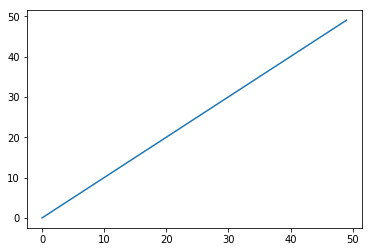

Ran Plot 2 (heading 2)


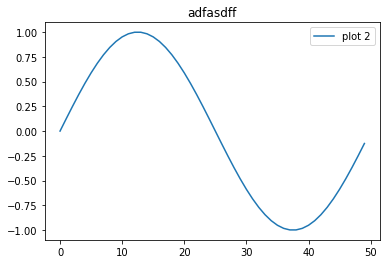

I am inside loaded_notebook!
in __init__
I should still be in __init__


In [2]:
from nbloader import Notebook
from nbloader.widget import NotebookWidget, Tab

notebook = Notebook('test.ipynb')
# tag __init__ is executed
assert notebook.ns['a'] == 5

try:
    notebook.ns['b']
except KeyError:
    assert True
else:
    assert False

notebook.run_all()
assert notebook.ns['a'] == 6
assert notebook.ns['b'] == 10
b = 6
assert notebook.ns['b'] == 10

# testing interactivity
c, d = 2, 3
notebook = Notebook('test.ipynb', ns=globals())
assert notebook.ns['c'] == c
assert notebook.ns['d'] == d
assert notebook.run_tag('create_b').ns['b'] == 10
assert b == 10

In [3]:
notebook.summary()

# This is a test notebook
	(9 cells.)
# Data
	(1 cells.)
  ## Data 1
		(2 cells.)
  ## Data 2
		(2 cells.)
  ## Plot 1
		(2 cells.)
  ## Plot 2
		(3 cells.)


In [4]:
notebook = Notebook('test.ipynb')
print('----- init done --------')
notebook.run_tag('add_one')
print(notebook.ns['a']) # 6
assert notebook.ns['a'] == 6

notebook.run_tag('add_one')
print(notebook.ns['a']) # 7
assert notebook.ns['a'] == 7

notebook.ns['a'] = 0
notebook.run_tag('add_one')
print(notebook.ns['a']) # 1
assert notebook.ns['a'] == 1

I am inside loaded_notebook!
in __init__
I should still be in __init__
----- init done --------
6
7
1


In [5]:
for c in notebook.cells:
    print(c['tags'])

['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook']
['This is a test notebook', '# This is a test notebook', 'create_b']
['This is a test notebook', '# This is a test notebook', 'add_one']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', 'raises_exception', '__skip__']
['Data', '# Data']
['Data', '# Data', 'Data 1', '## Data 1']
['Data', '# Data', 'Data 1', '## Data 1']
['Data', '# Data', 'Data 2', '## Data 2']
['Data', '# Data', 'Data 2', '## Data 2']
['Plot', '# Plot', 'Plot 1', '## Plot 1']
['Plot', '# Plot', 'Plot 1', '## Plot 1']
['Plot', '# Plot', 'Plot 2', '## Plot 2']
['Plot', '# Plot', 'Plot 2', '## Plot 2']
['Plot', '# Plot'

Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
-----data h1 done-----
Ran Data 1 (heading 2)
Ran Data 1 (heading 2)
-----data 1 h2 done-----
Ran Data 2 (heading 2)
Ran Data 2 (heading 2)
-----data 2 h2 done-----
Ran Plot 1 (heading 2)


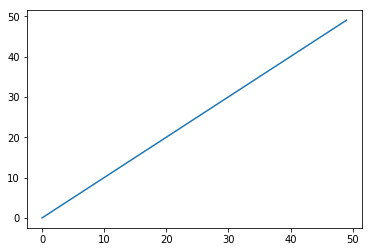

Ran Plot 2 (heading 2)


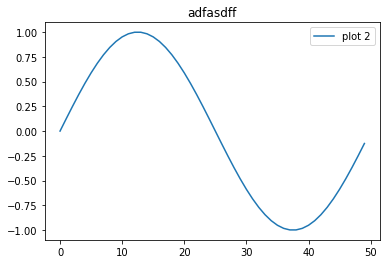

Ran Plot 1 (heading 2)


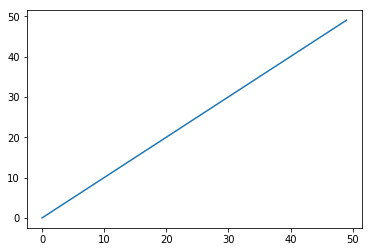

Ran Plot 2 (heading 2)


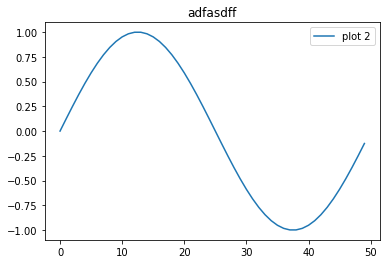

-----plot h1 done-----
Ran Plot 1 (heading 2)


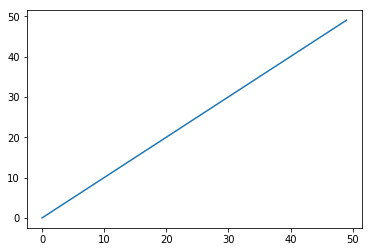

Ran Plot 1 (heading 2)


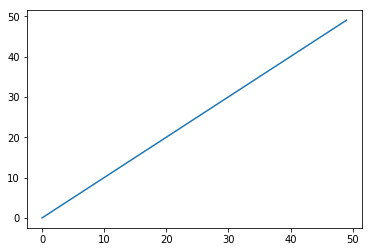

-----plot 1 h2 done-----
Ran Plot 2 (heading 2)


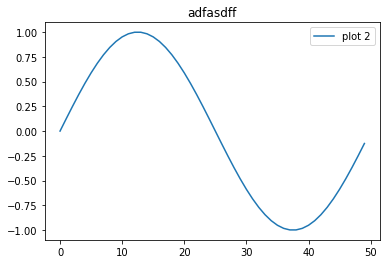

Ran Plot 2 (heading 2)


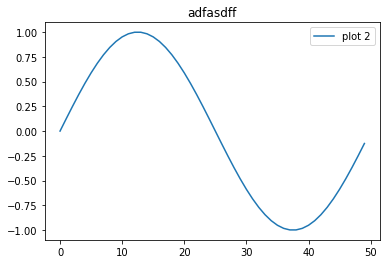

-----plot 2 h2 done-----


In [6]:
# we should see everything run twice
notebook.run_tag('Data')
notebook.run_tag('# Data')
print('-----data h1 done-----')
notebook.run_tag('Data 1')
notebook.run_tag('## Data 1')
print('-----data 1 h2 done-----')
notebook.run_tag('Data 2')
notebook.run_tag('## Data 2')
print('-----data 2 h2 done-----')

notebook.run_tag('Plot')
notebook.run_tag('# Plot')
print('-----plot h1 done-----')
notebook.run_tag('Plot 1')
notebook.run_tag('## Plot 1')
print('-----plot 1 h2 done-----')
notebook.run_tag('Plot 2')
notebook.run_tag('## Plot 2')
print('-----plot 2 h2 done-----')

In [7]:
notebook.ns['plt'].rcParams['figure.figsize'] = 15, 8

In [8]:
tab = Tab()
display(tab)

with tab.capture_item('init'):
    notebook = NotebookWidget('test.ipynb')
    notebook.ast_node_interactivity = 'last_expr'
    print('Data')
    notebook.run_tag('Data', collapsed=True)
    notebook.run_tag('Data', append=True)
#     notebook.run_tag('__skip__', append=True)
    notebook.run_tag('Data', append=True)
    notebook.run_tag('Data', append=True)
    notebook.run_tag('Data', append=True)

for i in range(5):
    with tab.capture_item(str(i)):
        print(i)
        notebook.ns['cycles'] += i
        notebook.run_tag('Data', show=False)
        print('Plot')
        notebook.run_tag('Plot')

Tab()

In [9]:
notebook.show_cells('This is a test notebook')

Carousel()

I am inside loaded_notebook!
in __init__
I should still be in __init__


Carousel()

Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
Ran Plot 1 (heading 2)


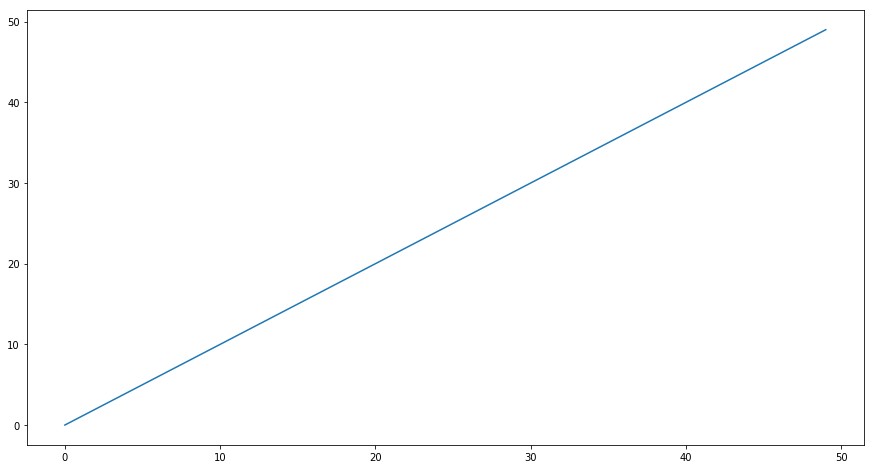

Ran Plot 2 (heading 2)


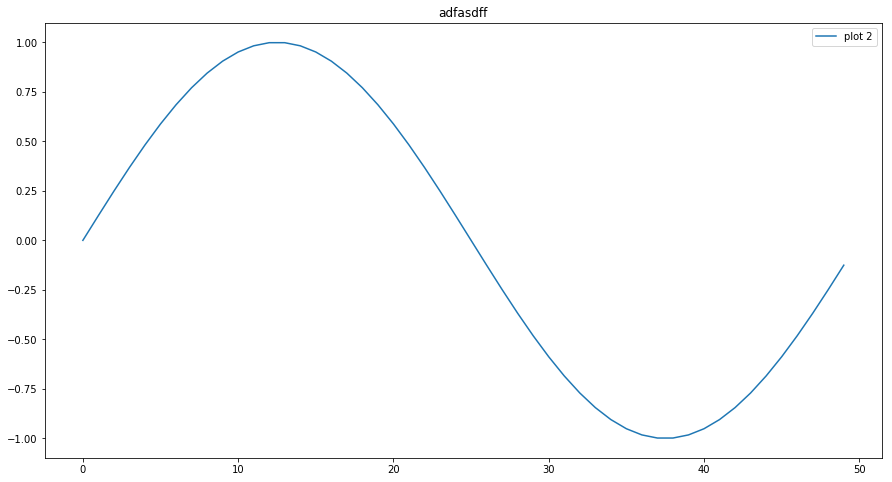

In [10]:
notebook = Notebook('test.ipynb', autorefresh=True)
notebook.run_tag('Data')
notebook.run_tag('Plot');

Ran Plot 1 (heading 2)


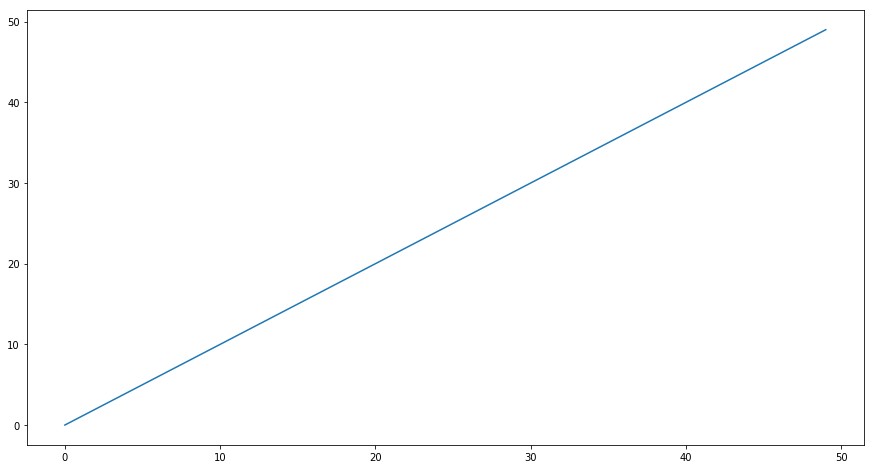

In [11]:
notebook.run_tag(('# Plot', 'Plot 1'))
try:
    notebook.run_tag(('# Plot', 'Plot 1234'))
except AssertionError:
    assert True
else:
    assert False